## Maze generation

### Generate a solvable maze using algorithms

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
maze = np.zeros([50, 50])
maze

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

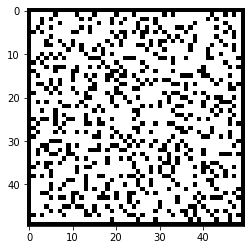

In [14]:
# Initialize maze
maze = np.zeros([50, 50])

# Fill in maze walls
for i in range(50):
    maze[i, 0] = 1
    maze[i, 49] = 1
    maze[0, i] = 1
    maze[49, i] = 1
    
# Place 500 blocks in random locations
# for i in range(500):
#     x = np.random.randint(1, 49)
#     y = np.random.randint(1, 49)
#     maze[x, y] = 1

# Maze algorithm #1
for i in range(800):
    # assign x, y randomly over each iteration
    x = np.random.randint(1, 49)
    y = np.random.randint(1, 49)
    
    # if 1 or fewer NSEW blocks around x,y are filled in, fill x,y
    if maze[x-1,y] + maze[x+1,y] + maze[x,y+1] + maze[x,y-1] <= 1:     
        maze[x,y] = 1

# Plot the maze
plt.imshow(maze, cmap="binary")

## Maze Solving
### Solve the maze generated above using an algorithm

In [15]:
x, y = 1, 1
path = [(x, y)]
print("path start:", path)
while (x, y) != (20, 20):
    next_locations = [(x+dx, y+dy) for dx, dy
                    in [(-1,0),(1,0),(0,-1),(0,1)]
                    if maze[x+dx, y+dy]==0]
    j = np.random.randint(len(next_locations))
    x, y = next_locations[j]
    
    # reduce redundancy by only including new locations not 
    # already in the path
    if (x, y) not in path:
        path.append((x, y))
    else:
        # if the path was visited, trim all locations since it was visited the first time
        k = path.index((x, y)) # find which step this location was visited
        path = path[:k+1]
print("---")
print("finished. (x,y) =",(x, y))
print("number of steps:", len(path))

path start: [(1, 1)]
---
finished. (x,y) = (20, 20)
number of steps: 171


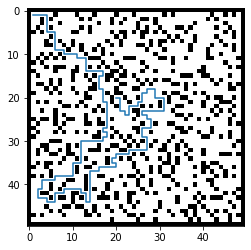

In [16]:
plt.imshow(maze, cmap="binary")
plt.plot([y for x, y in path], [x for x, y in path])